In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-31'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354963,16.478058,16.285971,16.432394,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
2763,2022-12-23,89.488457,89.777419,87.306303,87.306303,17815000
2764,2022-12-27,87.615196,89.179575,87.221614,88.990253,15470900
2765,2022-12-28,86.150452,88.203074,86.060778,87.186729,17879600


In [5]:
ma_100_days = data.Close.rolling(100).mean()

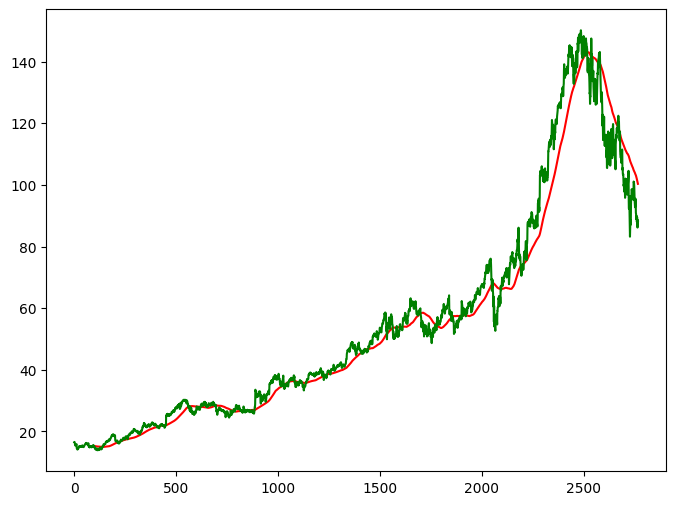

In [6]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

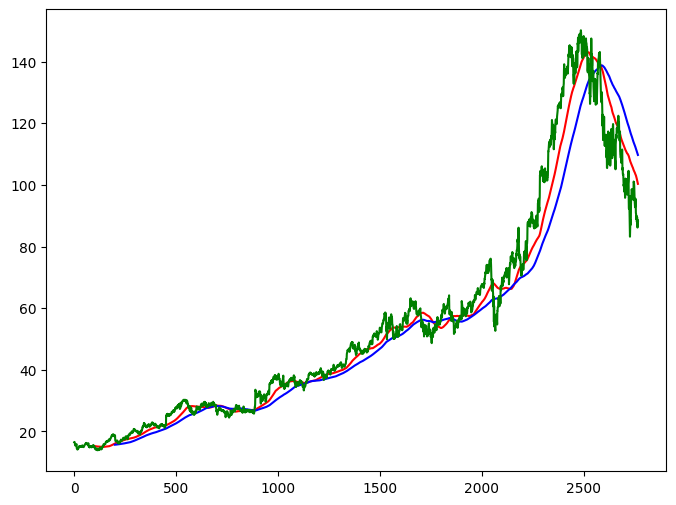

In [8]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.8): len(data)])


In [11]:
data_train.shape[0], data_test.shape[0]

(2214, 554)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [13]:
data_train_scale = scaler.fit_transform(data_train)

In [14]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [15]:
import numpy as np
x , y = np.array(x), np.array(y)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 80, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\jerem\OneDrive\Desktop\sav2\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 30s 201ms/step - loss: 0.0666
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 214ms/step - loss: 0.0099
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - loss: 0.0074
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 199ms/step - loss: 0.0063
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 188ms/step - loss: 0.0068
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - loss: 0.0058
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 195ms/step - loss: 0.0055
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - loss: 0.0057
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 16s 231ms/step - loss: 0.0060
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 14s 205ms/step - loss: 0.0050
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - loss: 0.0043
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - loss: 0.0043
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 194ms/step - loss: 0.0051
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 189ms/step - loss: 0.0042
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [20]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 80)                  │          51,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              81 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401,285 (1.53 MB)

 Trainable params: 133,761 (522.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 267,524 (1.02 MB)

In [21]:
pas_100_days = data_train.tail(100)

In [22]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [23]:
data_test

Ticker,GOOG
0,71.190208
1,71.334686
2,71.703362
3,71.561874
4,70.356201
...,...
649,89.488457
650,87.615196
651,86.150452
652,88.631538


In [24]:
data_test_scale = scaler.fit_transform(data_test)

In [26]:
import numpy as np
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step  


In [29]:
scale = 1/scaler.scale_

In [30]:
y_predict = y_predict*scale

In [31]:
y = y*scale

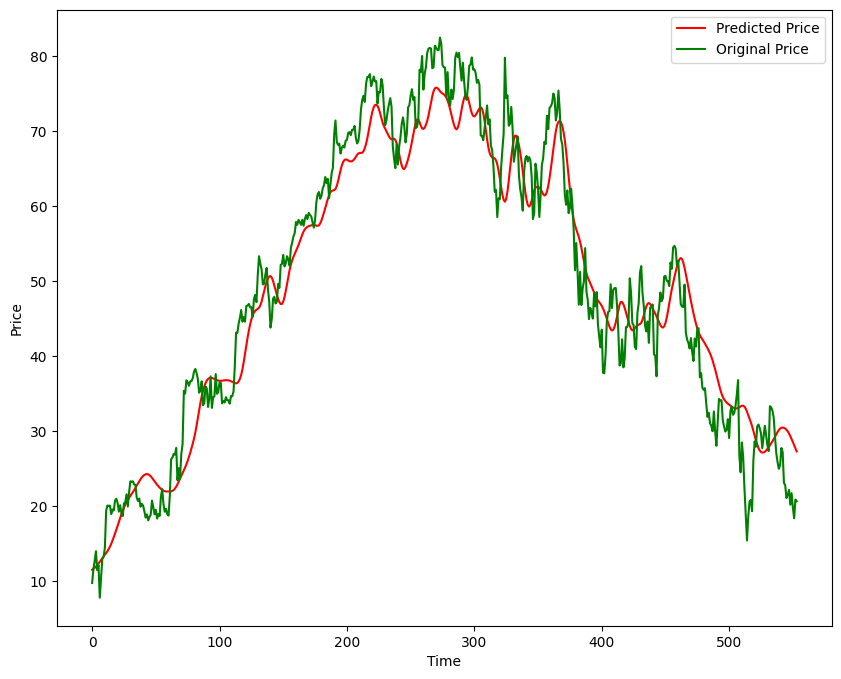

In [32]:
plt.figure(figsize = (10, 8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label ='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save('Stock Predictions Model.keras')